## Accessing Elements in Pandas DataFrames

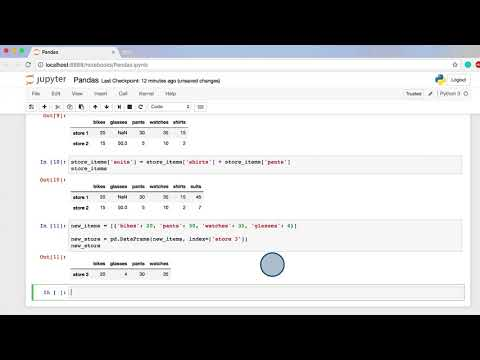

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("lClsJnZn_7w",width="100%")

We can access elements in Pandas DataFrames in many different ways. In general, we can access rows, columns, or individual elements of the DataFrame by using the row and column labels. We will use the same store_items DataFrame created in the previous lesson. Let's see some examples:

In [2]:
import pandas as pd

# From previous topic 
# We create a list of Python dictionaries
items2 = [{'bikes': 20, 'pants': 30, 'watches': 35}, 
          {'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5}]

# We create a DataFrame  and provide the row index
store_items = pd.DataFrame(items2, index = ['store 1', 'store 2'])

# We print the store_items DataFrame
print(store_items)

# We access rows, columns and elements using labels
print()
print('How many bikes are in each store:\n', store_items[['bikes']])
print()
print('How many bikes and pants are in each store:\n', store_items[['bikes', 'pants']])
print()
print('What items are in Store 1:\n', store_items.loc[['store 1']])
print()
print('How many bikes are in Store 2:', store_items['bikes']['store 2'])

         bikes  glasses  pants  watches
store 1     20      NaN     30       35
store 2     15     50.0      5       10

How many bikes are in each store:
          bikes
store 1     20
store 2     15

How many bikes and pants are in each store:
          bikes  pants
store 1     20     30
store 2     15      5

What items are in Store 1:
          bikes  glasses  pants  watches
store 1     20      NaN     30       35

How many bikes are in Store 2: 15


It is important to know that when accessing individual elements in a DataFrame, as we did in the last example above, the labels should always be provided with the column label first, i.e. in the form dataframe[column][row]. For example, when retrieving the number bikes in store 2, we first used the column label bikes and then the row label store 2. If you provide the row label first you will get an error.

We can also modify our DataFrames by adding rows or columns. Let's start by learning how to add new columns to our DataFrames. Let's suppose we decided to add shirts to the items we have in stock at each store. To do this, we will need to add a new column to our store_items DataFrame indicating how many shirts are in each store. Let's do that:

In [3]:
# We add a new column named shirts to our store_items DataFrame indicating the number of
# shirts in stock at each store. We will put 15 shirts in store 1 and 2 shirts in store 2
store_items['shirts'] = [15,2]

# We display the modified DataFrame
store_items

,bikes,glasses,pants,watches,shirts
store 1,20,NaN,30,35,15
store 2,15,50.0,5,10,2


We can see that when we add a new column, the new column is added at the end of our DataFrame.

We can also add new columns to our DataFrame by using arithmetic operations between other columns in our DataFrame. Let's see an example:

In [4]:
# We make a new column called suits by adding the number of shirts and pants
store_items['suits'] = store_items['pants'] + store_items['shirts']

# We display the modified DataFrame
store_items

,bikes,glasses,pants,watches,shirts,suits
store 1,20,NaN,30,35,15,45
store 2,15,50.0,5,10,2,7


Suppose now, that you opened a new store and you need to add the number of items in stock of that new store into your DataFrame. We can do this by adding a new row to the store_items Dataframe. To add rows to our DataFrame we first have to create a new Dataframe and then append it to the original DataFrame. Let's see how this works

In [5]:
# We create a dictionary from a list of Python dictionaries that will number of items at the new store
new_items = [{'bikes': 20, 'pants': 30, 'watches': 35, 'glasses': 4}]

# We create new DataFrame with the new_items and provide and index labeled store 3
new_store = pd.DataFrame(new_items, index = ['store 3'])

# We display the items at the new store
new_store

,bikes,glasses,pants,watches
store 3,20,4,30,35


We now add this row to our store_items DataFrame by using the .append() method.

In [6]:
# We append store 3 to our store_items DataFrame
store_items = store_items.append(new_store)

# We display the modified DataFrame
store_items

/home/yoelrc88/miniconda3/envs/ai-python-env/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,bikes,glasses,pants,shirts,suits,watches
store 1,20,NaN,30,15.0,45.0,35
store 2,15,50.0,5,2.0,7.0,10
store 3,20,4.0,30,NaN,NaN,35


Notice that by appending a new row to the DataFrame, the columns have been put in alphabetical order.

We can also add new columns of our DataFrame by using only data from particular rows in particular columns. For example, suppose that you want to stock stores 2 and 3 with new watches and you want the quantity of the new watches to be the same as the watches already in stock for those stores. Let's see how we can do this

In [7]:
# We add a new column using data from particular rows in the watches column
store_items['new watches'] = store_items['watches'][1:]

# We display the modified DataFrame
store_items

,bikes,glasses,pants,shirts,suits,watches,new watches
store 1,20,NaN,30,15.0,45.0,35,NaN
store 2,15,50.0,5,2.0,7.0,10,10.0
store 3,20,4.0,30,NaN,NaN,35,35.0


It is also possible, to insert new columns into the DataFrames anywhere we want. The dataframe.insert(loc,label,data) method allows us to insert a new column in the dataframe at location loc, with the given column label, and given data. Let's add new column named shoes right before the suits column. Since suits has numerical index value 4 then we will use this value as loc. Let's see how this works:

In [8]:
# We insert a new column with label shoes right before the column with numerical index 4
store_items.insert(4, 'shoes', [8,5,0])

# we display the modified DataFrame
store_items

,bikes,glasses,pants,shirts,shoes,suits,watches,new watches
store 1,20,NaN,30,15.0,8,45.0,35,NaN
store 2,15,50.0,5,2.0,5,7.0,10,10.0
store 3,20,4.0,30,NaN,0,NaN,35,35.0


Just as we can add rows and columns we can also delete them. To delete rows and columns from our DataFrame we will use the .pop() and .drop() methods. The .pop() method only allows us to delete columns, while the .drop() method can be used to delete both rows and columns by use of the axis keyword. Let's see some examples

In [9]:
# We remove the new watches column
store_items.pop('new watches')

# we display the modified DataFrame
store_items

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,20,NaN,30,15.0,8,45.0,35
store 2,15,50.0,5,2.0,5,7.0,10
store 3,20,4.0,30,NaN,0,NaN,35


In [10]:
# We remove the watches and shoes columns
store_items = store_items.drop(['watches', 'shoes'], axis = 1)

# we display the modified DataFrame
store_items

,bikes,glasses,pants,shirts,suits
store 1,20,NaN,30,15.0,45.0
store 2,15,50.0,5,2.0,7.0
store 3,20,4.0,30,NaN,NaN


In [11]:
# We remove the store 2 and store 1 rows
store_items = store_items.drop(['store 2', 'store 1'], axis = 0)

# we display the modified DataFrame
store_items

,bikes,glasses,pants,shirts,suits
store 3,20,4.0,30,NaN,NaN


Sometimes we might need to change the row and column labels. Let's change the bikes column label to hats using the .rename() method

In [12]:
# We change the column label bikes to hats
store_items = store_items.rename(columns = {'bikes': 'hats'})

# we display the modified DataFrame
store_items

,hats,glasses,pants,shirts,suits
store 3,20,4.0,30,NaN,NaN


Now let's change the row label using the .rename() method again.

In [13]:
# We change the row label from store 3 to last store
store_items = store_items.rename(index = {'store 3': 'last store'})

# we display the modified DataFrame
store_items

,hats,glasses,pants,shirts,suits
last store,20,4.0,30,NaN,NaN


You can also change the index to be one of the columns in the DataFrame.

In [31]:
# We change the row index to be the data in the pants column
store_items = store_items.set_index('pants')

# we display the modified DataFrame
store_items

,hats,glasses,shirts,suits
pants,,,,
30,20,4.0,NaN,NaN
